This is the BFS deterministic algorithm to recognize cycle.

In [7]:
import numpy as np
def init(X):
    Y = np.zeros(X.shape)+1e9
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i,j] == 1:
                Y[i,j] = 0
                return Y

def conv(X,raw):
    Xpad = np.pad(X, ((1,1),(1,1)), 'constant', constant_values=1e9)
    Y = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            lala = []
            lala.append(Xpad[i+1,j+1])
            lala.append(Xpad[i+1,j] + 1)
            lala.append(Xpad[i,j+1] + 1)
            lala.append(Xpad[i+1,j+2] + 1)
            lala.append(Xpad[i+2,j+1] + 1)
            Y[i,j] = min(lala) if raw[i][j] else 1e9
    return Y

def extract(X):
    Xpad = np.pad(X, ((1,1),(1,1)), 'constant', constant_values=1e9)
    Y = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            v = Xpad[i+1,j+1]
            l = np.array([Xpad[i+1,j], Xpad[i,j+1], Xpad[i+2,j+1], Xpad[i+1,j+2]]) - v
            Y[i,j] = np.sum(l == -1) >= 2
            # Y[i,j] = v < 1e8 and ((np.sum(l==0) == 1) or (np.sum(l==-1) == 2))
    show(Y)
    return np.any(Y)

def recognize(X):
    a = init(X)
    for _ in range(60):
        a = conv(a,X)
    return extract(a)

Next is a test to the deterministic algorithm.

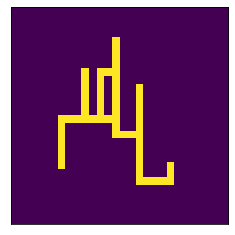

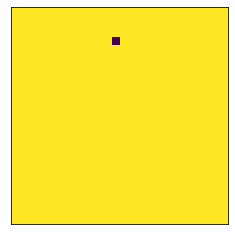

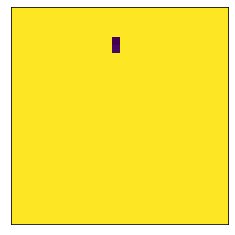

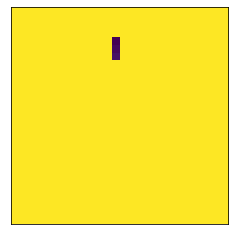

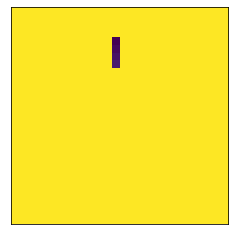

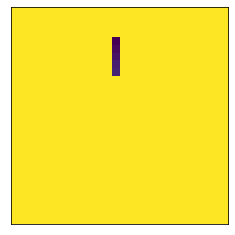

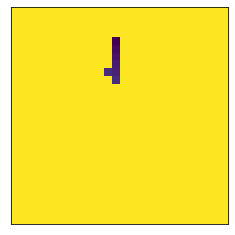

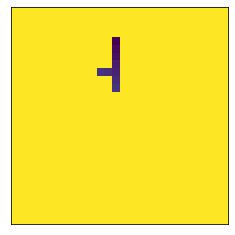

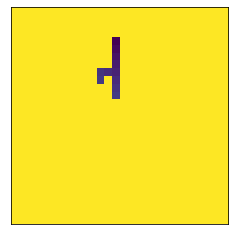

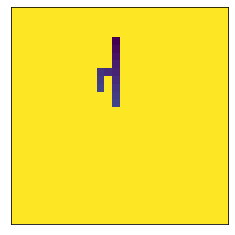

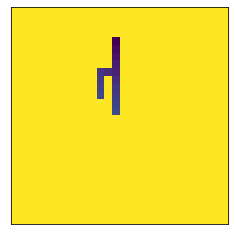

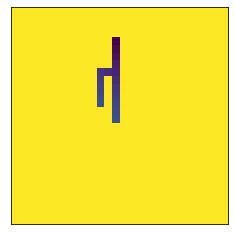

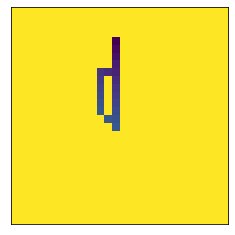

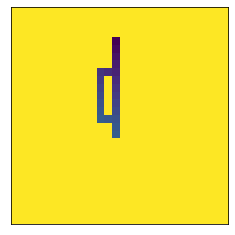

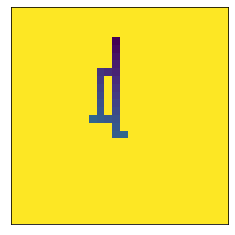

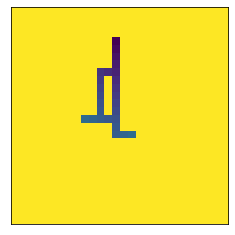

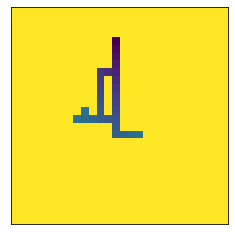

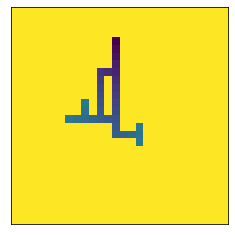

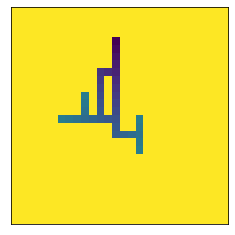

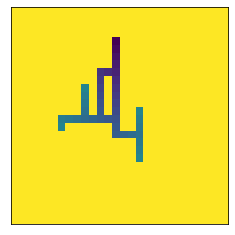

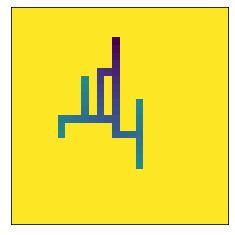

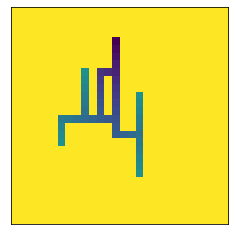

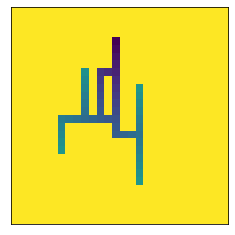

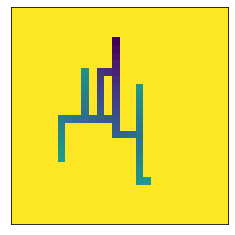

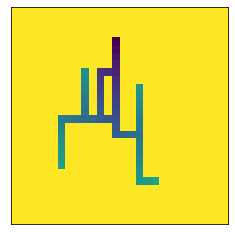

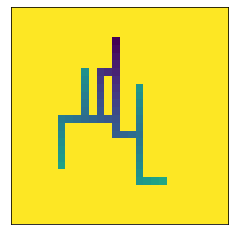

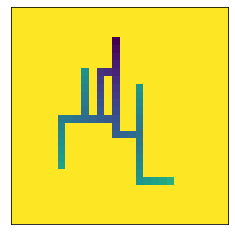

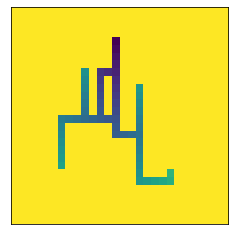

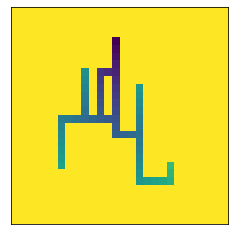

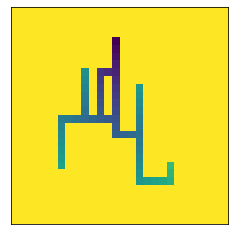

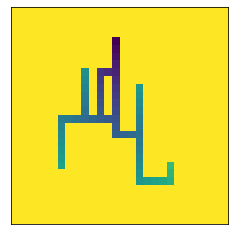

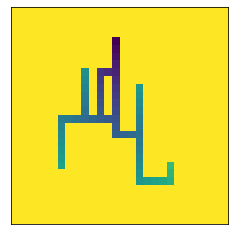

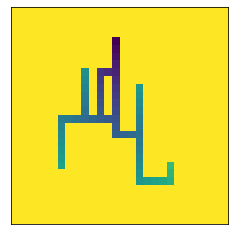

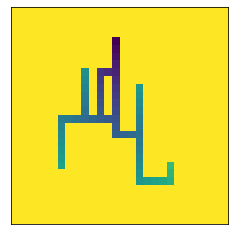

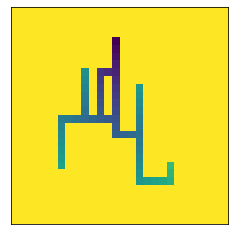

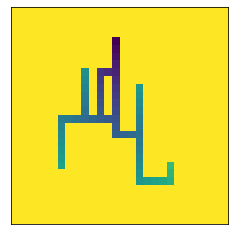

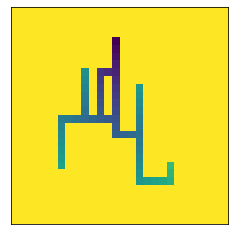

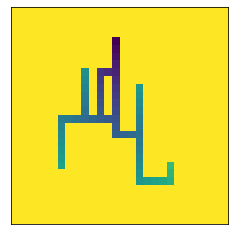

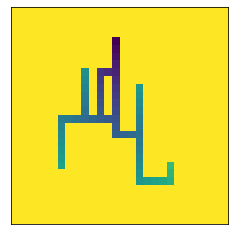

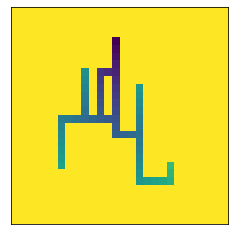

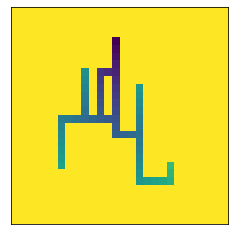

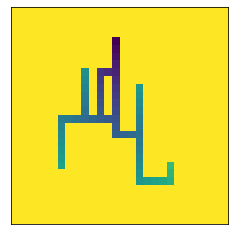

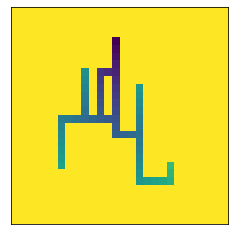

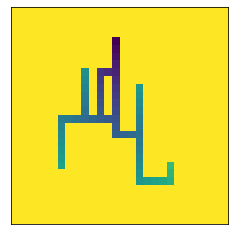

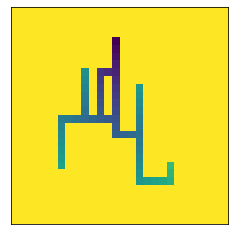

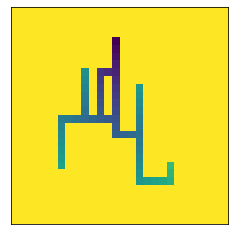

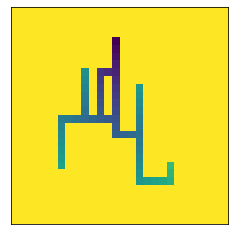

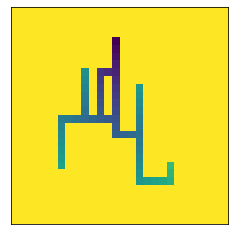

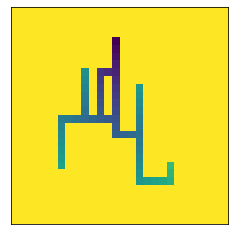

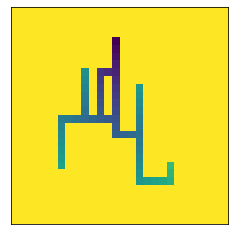

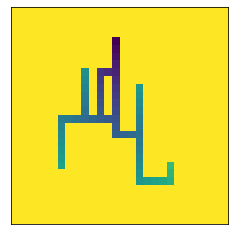

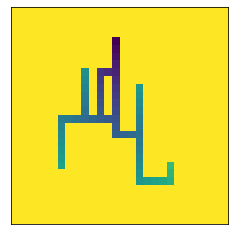

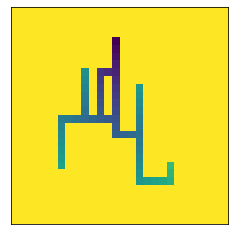

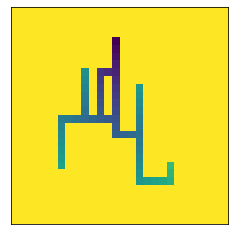

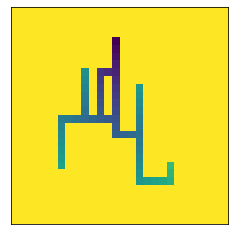

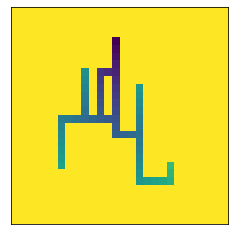

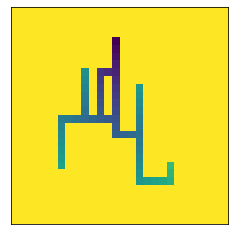

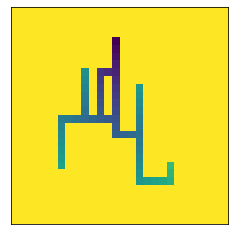

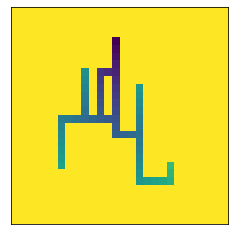

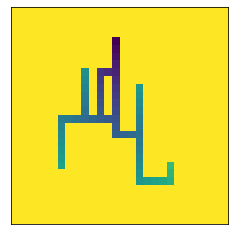

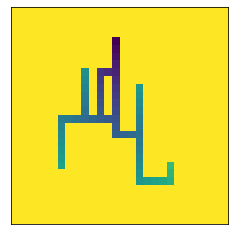

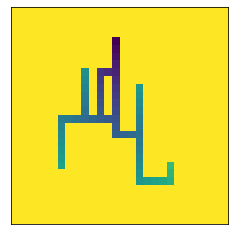

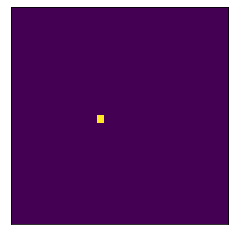

In [8]:
import matplotlib.pyplot as plt
cycle_dataset = np.load('cycle_dataset.npz')
train_images = cycle_dataset['train_images']
train_labels = cycle_dataset['train_labels']
test_images = cycle_dataset['test_images']
test_labels = cycle_dataset['test_labels']

def show(X):
    '''
    Changing inf to 40 can get a picture with more detail.
    '''
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i,j] > 1000:
                X[i,j] = 40
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X)
    plt.show()

X = test_images[10]
show(X)
a = init(X)
show(a)
for _ in range(60):
    a = conv(a,X)
    show(a)
b = extract(a)